In [1]:
# We will collect the main libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
# We import most of the data from the data set
popu=pd.read_csv('population_diabetes.csv')
sample=pd.read_excel('sample.xlsx')
chi=pd.read_excel('chi_square.xlsx')

In [5]:
popu.info()
sample.info()
# we see in both the dataset have only numeric values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 9 columns):
Pregnancies                 42 non-null int64
Glucose                     42 non-null int64
BloodPressure               42 non-null int64
SkinThickness               42 non-null int64
Insulin                     42 non-null int64
BMI                         42 non-null float64
DiabetesPedigreeFunction    42 non-nul

In [6]:
# Replace zero with NaN
colum=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
popu[colum]=popu[colum].replace(['0', 0], np.nan)

In [7]:
# we will see all the columns and see that every will need diffrent
# we will put mean in age,bmi,gulcose,bloood pressure,insulin,diabeties pedigree function
# we will put median in pregnancies,outcome
#For Mean
column=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
popu[column]=popu[column].fillna(popu[column].mean())
#For Mode
column=['Pregnancies','Outcome']
popu[column]=popu[column].fillna(popu[column].mode().iloc[0])

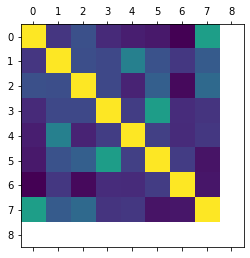

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.135815,0.222968,0.094638,0.059591,0.040288,-0.028443,0.548175,NaN
Glucose,0.135815,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,NaN
BloodPressure,0.222968,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,NaN
SkinThickness,0.094638,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,NaN
Insulin,0.059591,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,NaN
BMI,0.040288,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,NaN
DiabetesPedigreeFunction,-0.028443,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,NaN
Age,0.548175,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,NaN
Outcome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Correlation metrics
correlation = popu.corr()
plt.matshow(correlation)
plt.show()
correlation

In [132]:
# Ifereneces till now
# If we see till now that there are many that have very lille to no effects like when we see outcome all have 1 after we did the basic of mode that is there.
#After seeing the cooorelation we see that some are largely related



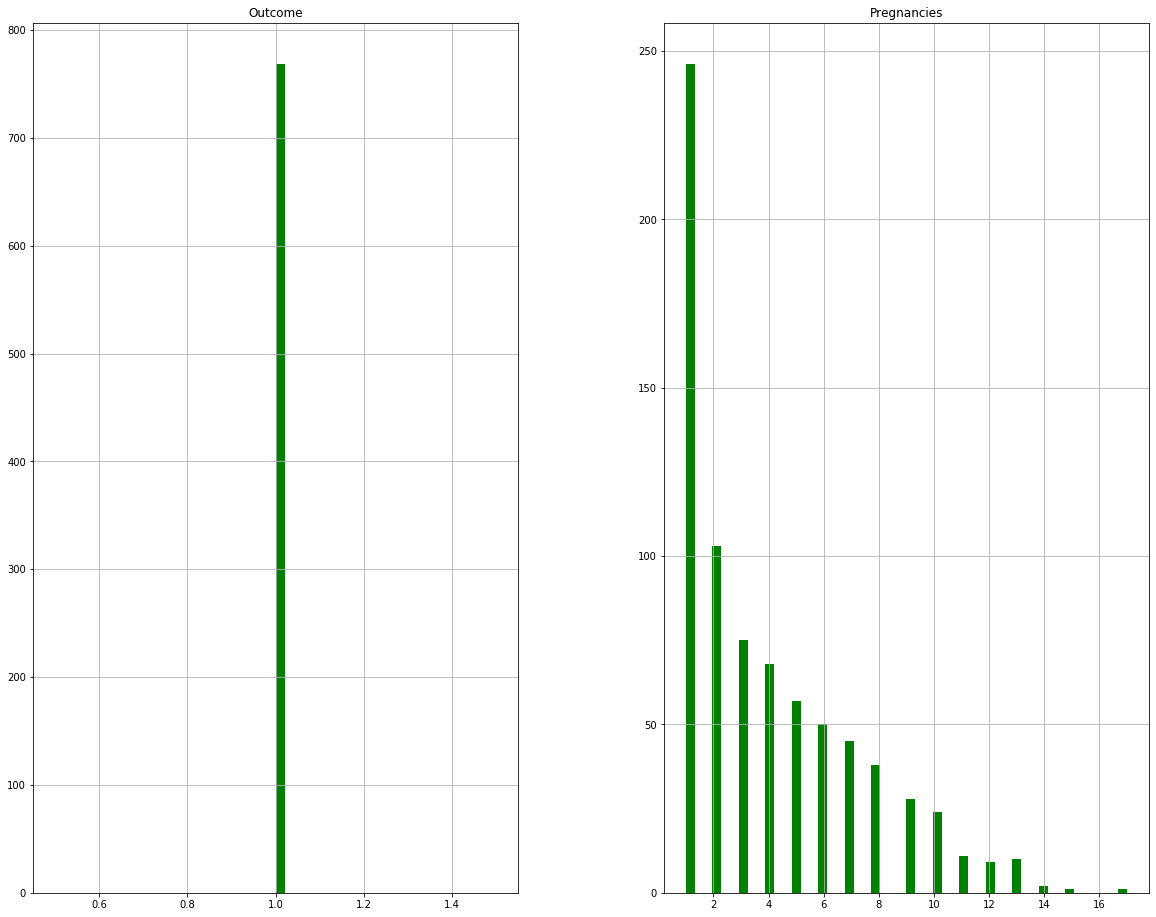

In [9]:
# We see that there are some like outcome and pregananicies have less disictinct values so we see the pattern by bar graph
column=['Pregnancies','Outcome']
sample1=popu[column]
sample1.hist(bins=50,figsize=(20,16),color='green')
plt.show()

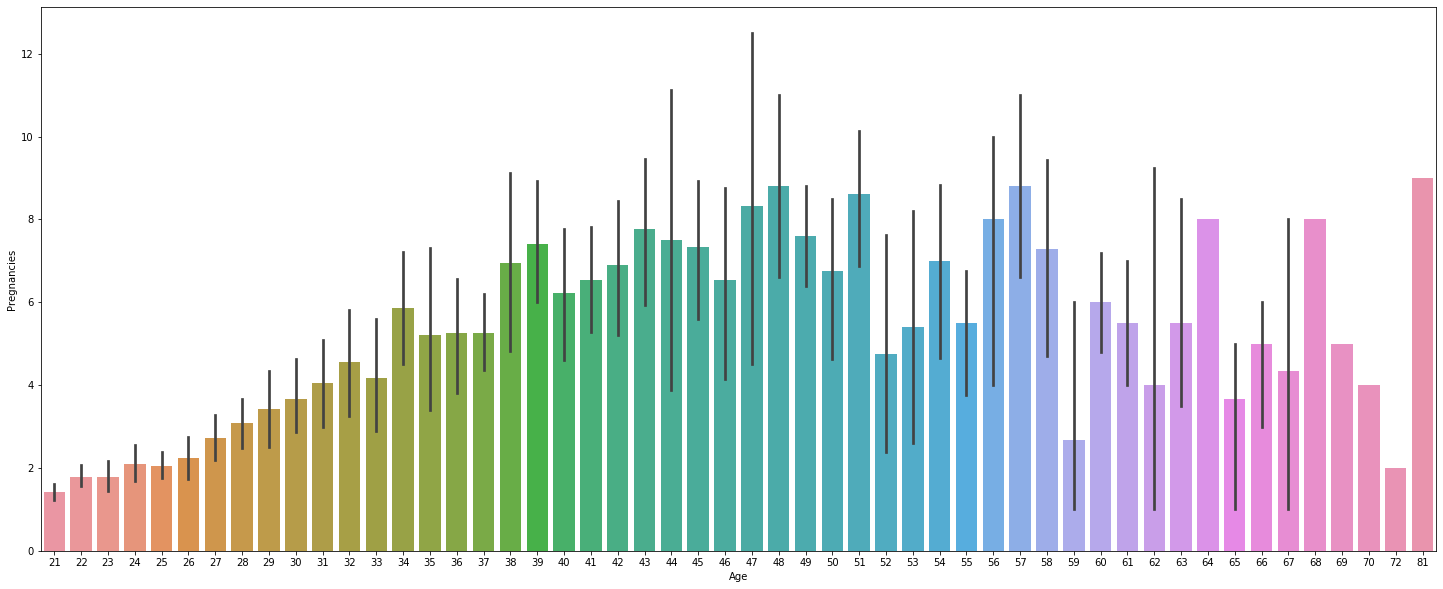

In [16]:
# Inference
# We see that there are only 1 outcome only
# we also see most the data points in correlation we see that most allies well with the age factor.
#So with plots we will see the relationship.
plt.figure(figsize = (25, 10))
sns.barplot(x = 'Age', y = 'Pregnancies', data = popu)


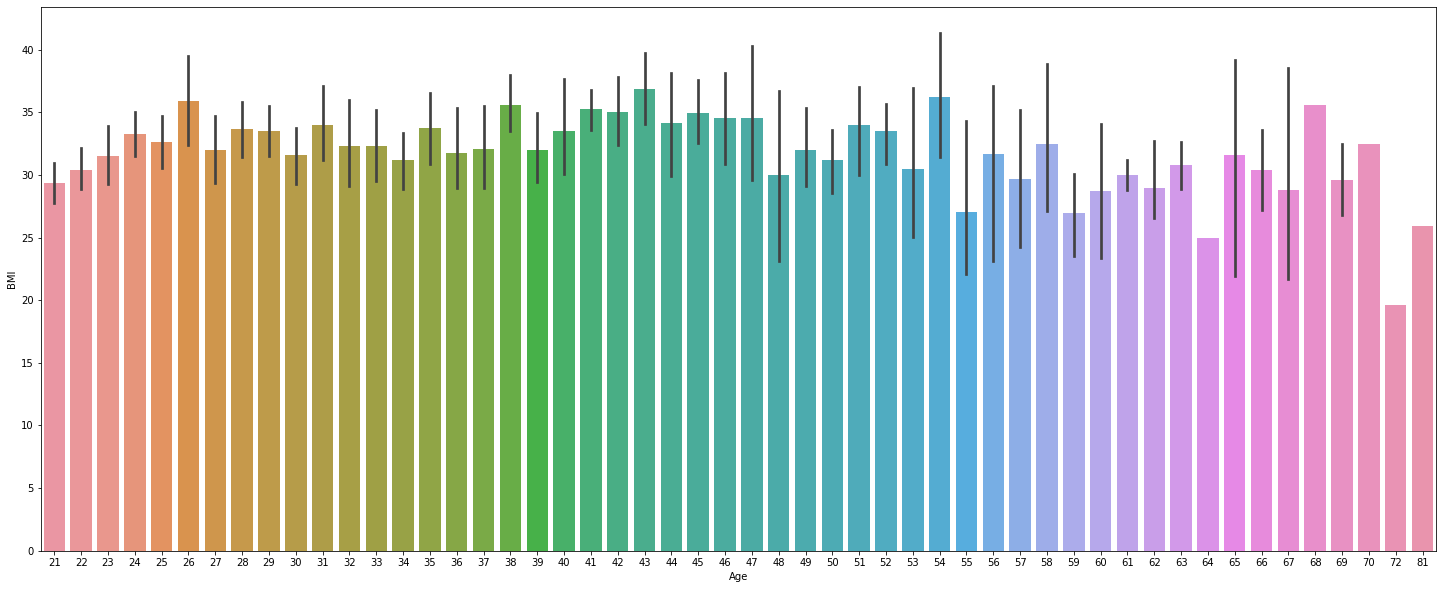

In [18]:
plt.figure(figsize = (25, 10))
sns.barplot(x = 'Age', y = 'BMI', data = popu)


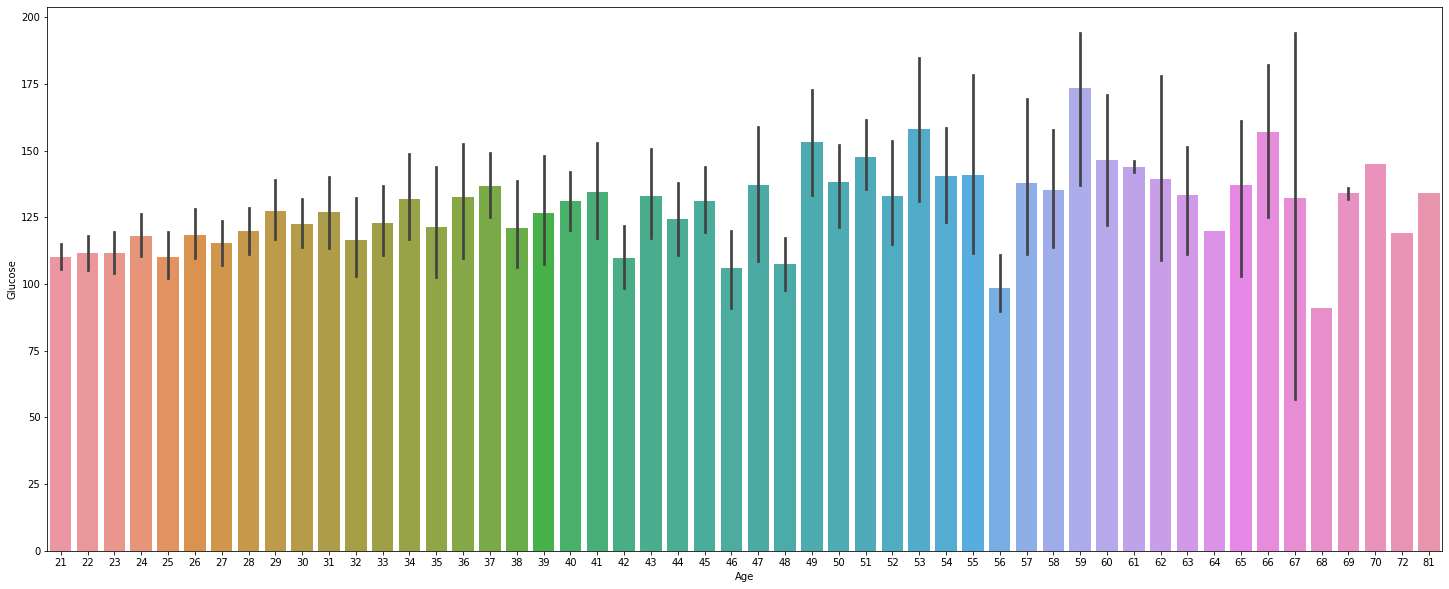

In [19]:
plt.figure(figsize = (25, 10))
sns.barplot(x = 'Age', y = 'Glucose', data = popu)


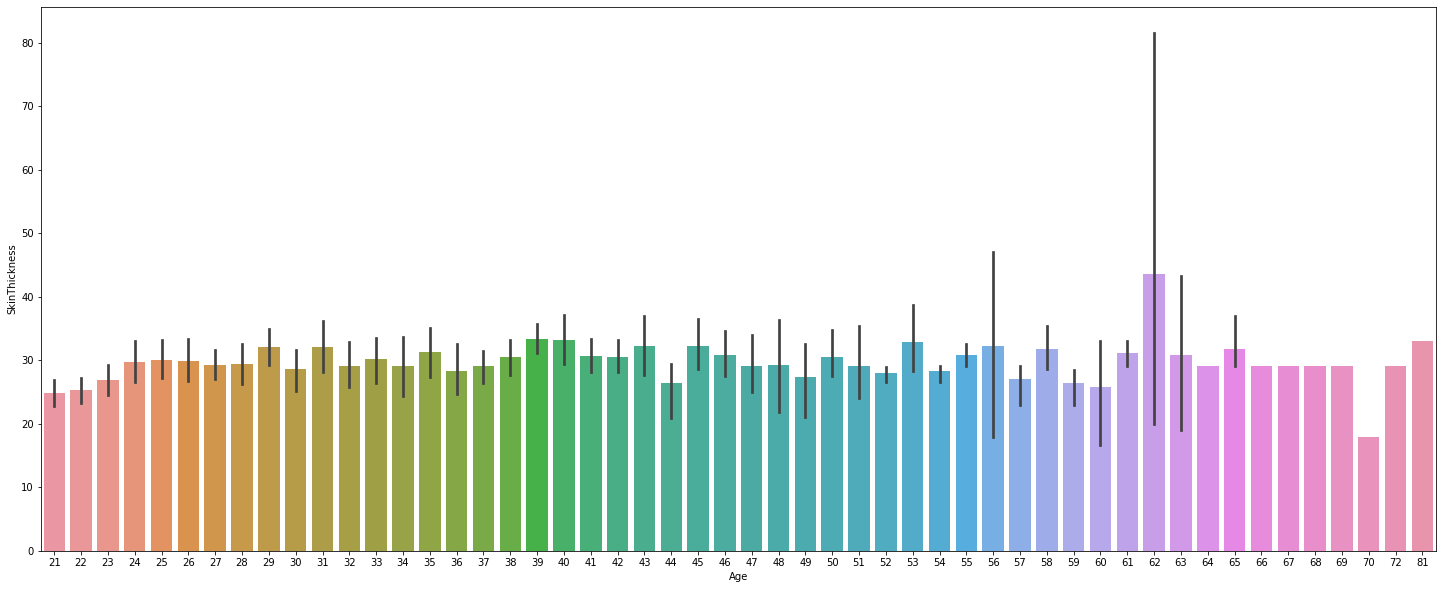

In [20]:
    plt.figure(figsize = (25, 10))
    sns.barplot(x = 'Age', y = 'SkinThickness', data = popu)

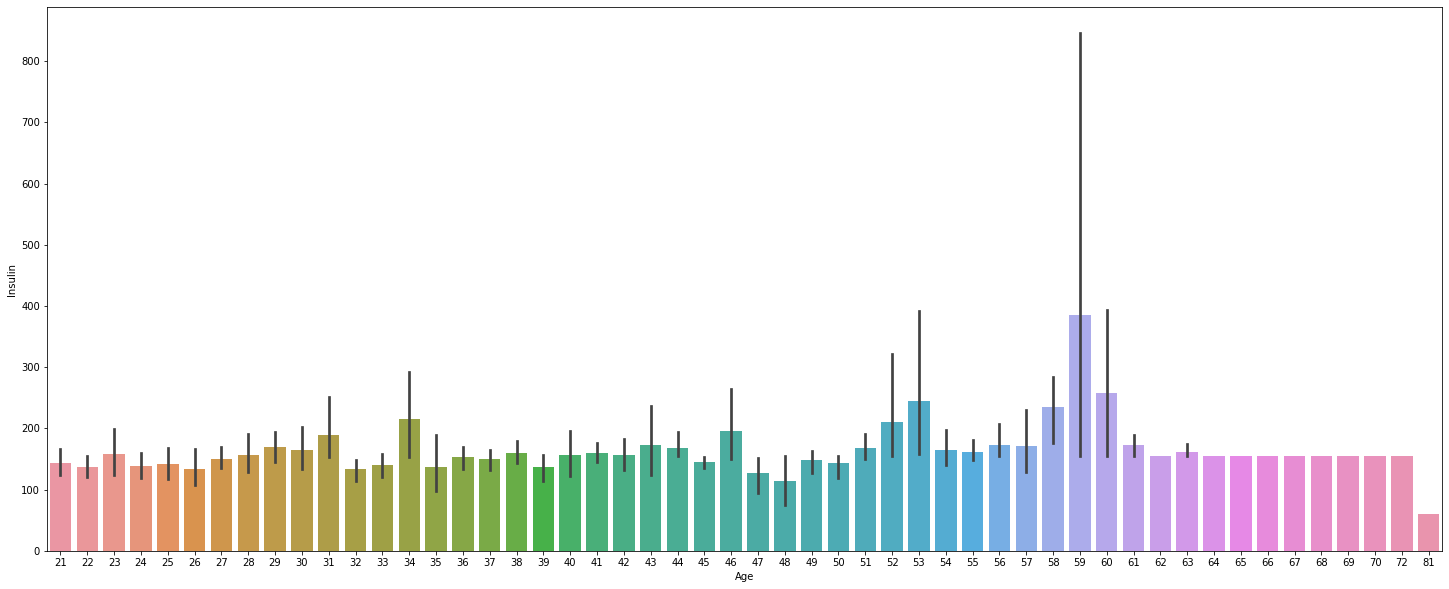

In [22]:
plt.figure(figsize = (25, 10))
sns.barplot(x = 'Age', y = 'Insulin', data = popu)

In [23]:
# Normal Derivative Z Test
from scipy import stats
from statsmodels.stats import weightstats as stests
# As sample size is greater then 30 so we will use it preferabely

In [37]:
ztest ,pval = stests.ztest(popu['Age'], x2=sample['Age'], value=0,alternative='two-sided')
print(float(pval))

0.012676164789452942


0.012676164789452942

In [26]:
# when we need to prove null hypotesis this pval is very important
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

reject null hypothesis


In [34]:
#One Sample T- Test
from scipy.stats import ttest_ind

In [38]:
ttest,pval = ttest_ind(popu['Age'],sample['Age'])
print(pval)

0.012875366032677355


In [39]:
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

reject null hypothesis
